In [1]:
import numpy as np
import os.path
from scipy import ndimage
from scipy.interpolate import griddata
import itertools
import matplotlib as mpl
import math
import matplotlib.pyplot as plt
from mapping import creategrid as grd
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pylab as pylab
import pandas as pd
from eod import msg as msg
pylab.rcParams['figure.figsize'] = 20., 12.
%matplotlib inline
import pyproj
#from mapping import proj

In [2]:
HOD=range(24)   # hours of day
CFAC=-781648343
LFAC=-781648343
COFF=1856
LOFF=1856
YRANGE=range(2004,2014)

tpath= "/users/global/cornkle/data/OBS/TRMM/trmm_swaths_WA/"
tf=msg.extract_TRMMfile(tpath, hod=HOD, yrange=YRANGE, mtresh=1)
tf.keys()
print(len(tf['fpath']))

1064


In [3]:
tnb=np.array(range(len(tf['fpath'])))
maxs=[]
for tp in tnb:
    dmsg, dtrmm=msg.quickreadTrmmMSG(tf, nb=tp)
    td=dtrmm['pcp'].mean().max()
    maxs.append(td)
sort_max, sort_nbs = zip(*sorted(zip(maxs, tnb), reverse=True))

In [7]:
print(sort_max[0:10])
print(sort_nbs[0:10])

(1.4574619424317103, 1.2604372566636788, 0.94629474740715469, 0.78822898650985707, 0.75571597933779167, 0.72896770358628826, 0.71934199688844214, 0.70978014394163236, 0.70650733977801272, 0.70113297988234335)
(334, 490, 845, 437, 730, 696, 841, 79, 992, 288)


In [8]:
top5=sort_nbs[0:5]
print(top5)

(334, 490, 845, 437, 730)


In [26]:
NB=top5[1]
mi=tf['tmins'][NB]
dmsg, dtrmm=msg.quickreadTrmmMSG(tf, nb=NB)
mlat=dmsg['lats']
mlon=dmsg['lons']
md=dmsg['t']
tlat=dtrmm['lats']
tlon=dtrmm['lons']
td=dtrmm['pcp']

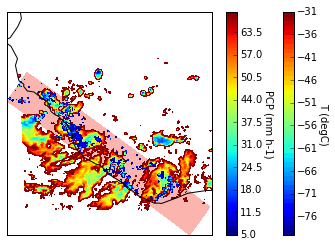

In [32]:
dy1=0
dy2=450
dx1=20
dx2=450
tdy1=60
tdy2=450

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.contourf(tlon[tdy1:tdy2, :], tlat[tdy1:tdy2, :], td[tdy1:tdy2, :],levels=np.arange(0,100, 0.5), transform=ccrs.PlateCarree(), cmap='Pastel1')
plt.contourf(mlon[dy1:dy2, dx1:dx2], mlat[dy1:dy2, dx1:dx2], md[dy1:dy2, dx1:dx2], levels=np.arange(-80,-30,1), transform=ccrs.PlateCarree())
cbar=plt.colorbar()
cbar.set_label('T (degC)', rotation=270, labelpad=+11)
plt.contourf(tlon[tdy1:tdy2, :], tlat[tdy1:tdy2, :], td[tdy1:tdy2, :],levels=np.arange(5,70, 0.5), transform=ccrs.PlateCarree())

cbar=plt.colorbar()
cbar.set_label('PCP (mm h-1)', rotation=270, labelpad=+11)
plt.savefig('/users/global/cornkle/'+str(NB)+'_msgtd0_p_'+str(mi)+'.pdf')


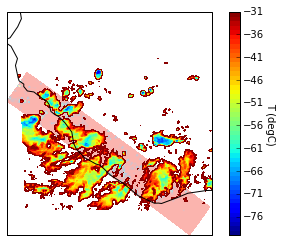

In [33]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(tlon[tdy1:tdy2, :], tlat[tdy1:tdy2, :], td[tdy1:tdy2, :],levels=np.arange(0,100, 0.5), transform=ccrs.PlateCarree(), cmap='Pastel1')
plt.contourf(mlon[dy1:dy2, dx1:dx2], mlat[dy1:dy2, dx1:dx2], md[dy1:dy2, dx1:dx2], levels=np.arange(-80,-30,1), transform=ccrs.PlateCarree())
cbar=plt.colorbar()
cbar.set_label('T (degC)', rotation=270, labelpad=+11)
ax.coastlines()
plt.savefig('/users/global/cornkle/'+str(NB)+'_msgtd0.pdf')

In [84]:
m = Basemap(width=12000000,height=9000000,projection='mercator',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)

array([0, 1, 2, 3, 4, 5])

In [194]:
mercator=pyproj.Proj("+init=EPSG:3857")

In [198]:
x, y=mercator(mlon, mlat)

In [201]:
mlat

array([[  3.94719744,   3.94708943,   3.9469614 , ...,   4.02024937,
          4.02049541,   4.02072763],
       [  3.97467399,   3.97457552,   3.97443843, ...,   4.04824352,
          4.04849911,   4.04873514],
       [  4.00216055,   4.00205374,   4.00191498, ...,   4.07623863,
          4.07649755,   4.07673502],
       ..., 
       [ 20.41603279,  20.41537476,  20.41458893, ...,  20.8565979 ,
         20.85813713,  20.85949516],
       [ 20.44630051,  20.44569588,  20.44486427, ...,  20.8877697 ,
         20.8893261 ,  20.89079285],
       [ 20.47672844,  20.4761219 ,  20.47529411, ...,  20.91907501,
         20.92054749,  20.92202568]], dtype=float32)